In [1]:
%matplotlib inline
from phase_mixing_utils import *
from numpy.fft import fft2 as fft2
from numpy.fft import ifft2 as ifft2
from numpy.fft import fftshift as fftshift


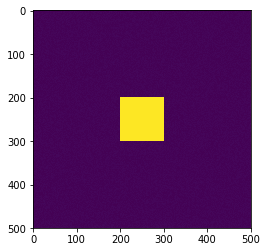

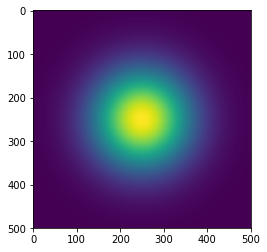

In [2]:
#Parameters to set
def gen_circ(nx=500,ny=500,mu_x=0,mu_y=0,var_x=10,var_y=10):
    from scipy.stats import multivariate_normal
#     mu_x = 0
    variance_x = var_x

#     mu_y = 0
    variance_y = var_y

    #Create grid and multivariate normal

    x = np.linspace(-10,10,nx)
    y = np.linspace(-10,10,ny)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

    return rv.pdf(pos)
circ = gen_circ()
nx = 500
ny = 500
sqr = np.zeros([nx,ny])+.1*(np.random.rand(nx,ny)+.1) # add noise to avoid divide by zero errors
sqr[np.int(nx/2-.1*nx):np.int(nx/2+.1*nx),np.int(ny/2-.1*ny):np.int(ny/2+.1*ny)] = 5
plt.imshow(sqr)
plt.show()
plt.imshow(circ)

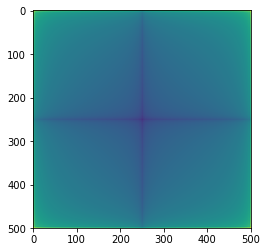

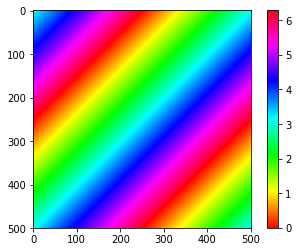

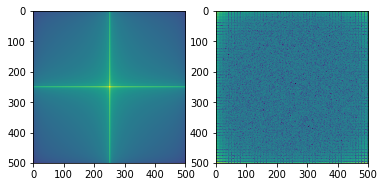

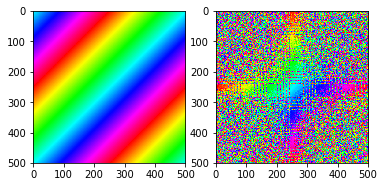

In [3]:
# plt.imshow(np.real(np.fft.ifft2(np.fft.fft2(circ))))
# plt.show()
circ_FT = fft2(circ)
sqr_FT = fft2(sqr)
plt.imshow(np.log(get_mag(circ_FT)))
plt.show()
plt.imshow(get_phase(circ_FT),cmap='hsv')
plt.colorbar()
plt.show()
#compare magnitudes
fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.log(get_mag(fftshift(circ_FT))))
ax[1].imshow(np.log(get_mag(sqr_FT)))
plt.show()
#compare phases
fig, ax = plt.subplots(1, 2)
ax[0].imshow(get_phase(fftshift(circ_FT)),cmap='hsv')
ax[1].imshow(get_phase(fftshift(sqr_FT)),cmap='hsv')
plt.show()
# phase_intensity_plot(np.fft.fftshift(np.fft.fft2(circ)))

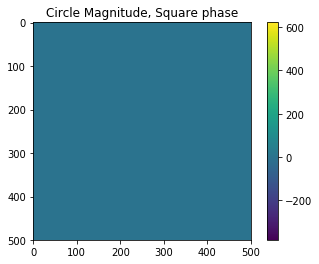

In [4]:
circ_sqr_mix = mix_FT(mag_arr = circ_FT,phase_arr = sqr_FT)
plt.imshow(np.real(np.fft.ifft2(circ_sqr_mix)))
plt.colorbar()
plt.title('Circle Magnitude, Square phase')
plt.show()

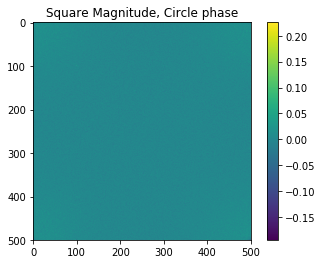

In [5]:
circ_sqr_mix = mix_FT_arr(mag_arr = circ_FT, phase_arr = sqr_FT)
plt.imshow(np.real(np.fft.ifft2(circ_sqr_mix)))
plt.colorbar()
plt.title('Square Magnitude, Circle phase')
plt.show()

/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


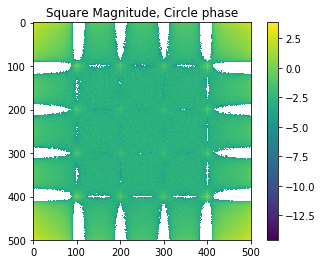

In [6]:
#maybe log scaling will help?
circ_sqr_mix = mix_FT_arr(mag_arr = sqr_FT, phase_arr = circ_FT)
plt.imshow(np.log(np.real(np.fft.ifft2(circ_sqr_mix))))
plt.colorbar()
plt.title('Square Magnitude, Circle phase')
plt.show()

In [7]:
#nope lol.... Why is intensity max at the corners???
#kinda  square pattern though

## oh jeez those get totally wrecked
checking below if im seriously messing up. though it seems like no

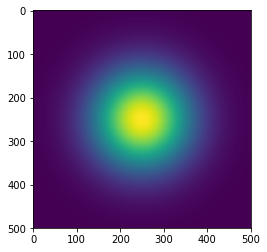

In [8]:
plt.imshow(np.real(np.fft.ifft2(circ_FT)))


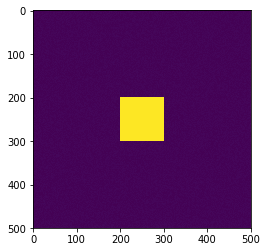

In [9]:
# ok looks fine check that also works for sqr
plt.imshow(np.real(np.fft.ifft2(sqr_FT)))


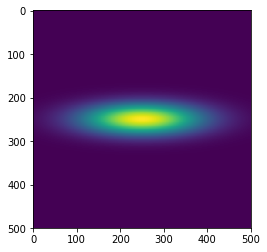

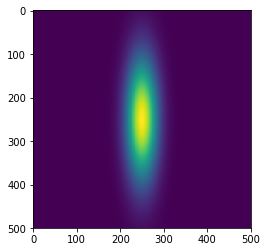

In [10]:
# maybe we shoudln't mess around with squares, sharp edges and all
#gonna try two different gaussians one stretched in y the other in x

stretch_x = gen_circ(var_x = 15, var_y =1 )
plt.imshow(stretch_x)
plt.show()

stretch_y = gen_circ(var_x = 1, var_y =15 )
plt.imshow(stretch_y)
plt.show()

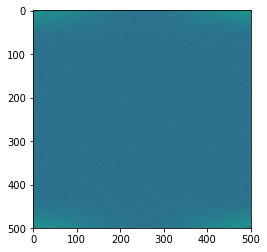

In [15]:
mixed = mix_FT(mag_arr = stretch_x, phase_arr=stretch_y)
plt.imshow(np.real(ifft2(mixed)))
plt.show()

#### Looks like nothing
BUT! if  i fftshift it the output might make more sense?? Unfortunately fftshifted doesn't seem justifiable. see below

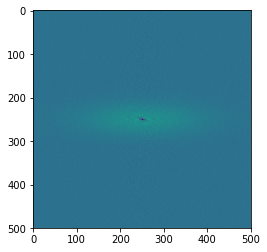

In [16]:
mixed = mix_FT(mag_arr = stretch_x, phase_arr=stretch_y)
plt.imshow(fftshift(np.real(ifft2(mixed))))
plt.show()